# Time series analysis of the data lakes

In [1]:
import glob
import json
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
import import_lakes
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import ARDRegression, BayesianRidge
from sklearn.metrics import mean_squared_error


## Lac Leman

In [2]:
#df = import_lakes.import_lake()
df = import_lakes.import_lake_LeXplore()
df.sort_values(by="M", inplace=True)

In [3]:
df["day"] = df["date"].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))

In [4]:
len(df["day"].unique())

202

In [5]:
# create new dataframe with mean values for each day and make day a column
df_day = df.groupby("day").mean()
df_day.reset_index(inplace=True)

/tmp/ipykernel_985/1668653208.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = df.groupby("day").mean()


<Axes: xlabel='day'>

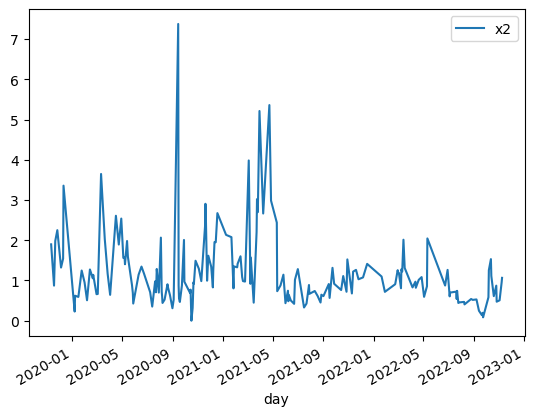

In [6]:
df_day.plot.line(x="day", y="x2")

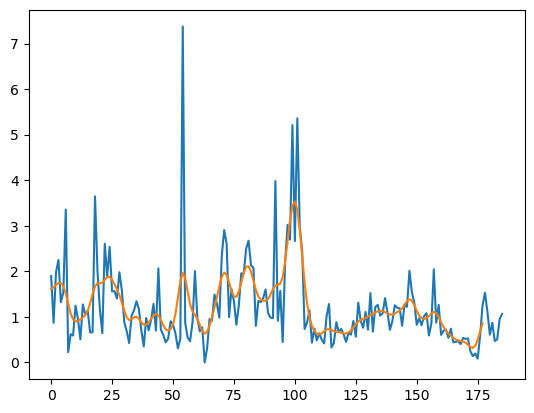

In [7]:
plt.plot(df_day['x2'].values)
plt.plot(gaussian_filter1d(df_day['x2'].values,2))

Text(0, 0.5, 'Temperature (°C)')

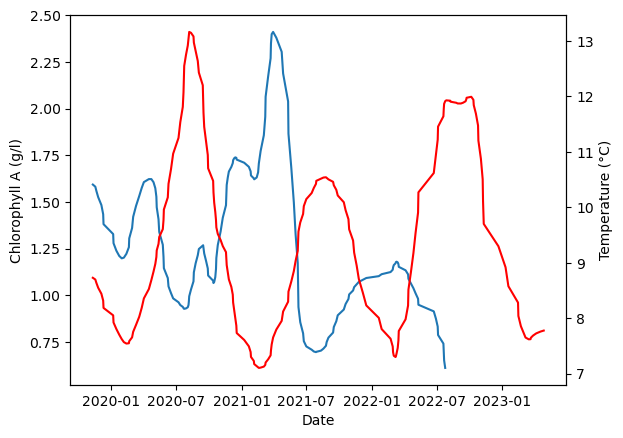

In [8]:
fig, ax = plt.subplots()
#ax.plot(df_day["day"], df_day["x2"], label="x2")
ax.plot(df_day["day"], gaussian_filter1d(df_day["x2"], 5), label="Chlorophyll A")
ax.set_ylabel("Chlorophyll A (g/l)")
ax.set_xlabel("Date")
# twin axis
ax2 = ax.twinx()
ax2.plot(df_day["day"], gaussian_filter1d(df_day["x"], 5), label="temperature", color="red")
ax2.set_ylabel("Temperature (°C)")


/tmp/ipykernel_985/738349656.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


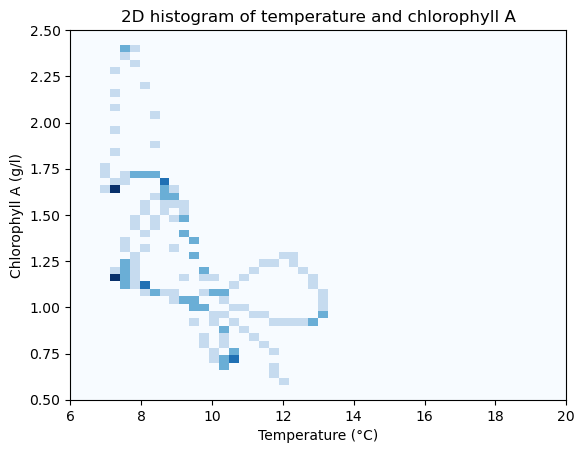

In [9]:
#2D histogram of x and x2
fig, ax = plt.subplots()
ax.hist2d(gaussian_filter1d(df_day["x"], 5), gaussian_filter1d(df_day["x2"], 5), bins=50, cmap="Blues", range=[[6,20],[0.5,2.5]])
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Chlorophyll A (g/l)")
ax.set_title("2D histogram of temperature and chlorophyll A")
fig.show()

## Zuger See

In [3]:
df_zug = import_lakes.import_lake_zug()
df_zug.sort_values(by="M", inplace=True)

In [11]:
len(df_zug["M"].unique())

79

In [12]:
df_zug["day"] = df_zug["date"].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
print(len(df_zug["day"].unique()))

5


## Greifen see

In [4]:
df_g = import_lakes.import_lake_greifen()
df_g["day"] = df_g["date"].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
print(len(df_g))
print(len(df_g["day"].unique()))

6374
991


In [27]:
df_g_day = df_g.groupby("day").mean()
df_g_day.reset_index(inplace=True)

/tmp/ipykernel_1074/818104055.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_g_day = df_g.groupby("day").mean()


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

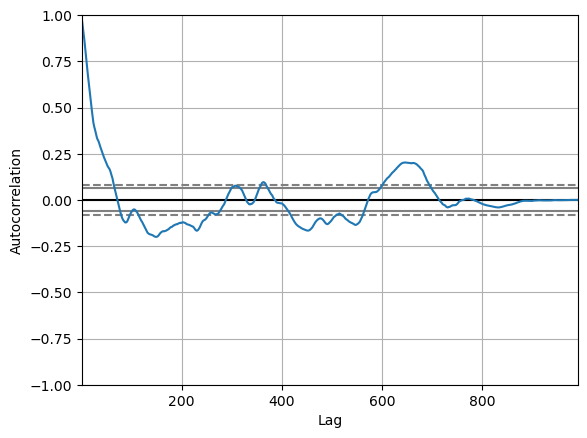

In [28]:
autocorrelation_plot(df_g_day["z6"])

In [78]:
df_g_day_gauss = df_g_day.copy()
df_g_day_gauss.dropna(inplace=True)
df_g_day_gauss["z1"] = gaussian_filter1d(df_g_day["z1"], 3)
df_g_day_gauss["z2"] = gaussian_filter1d(df_g_day["z2"], 3)
df_g_day_gauss["z3"] = gaussian_filter1d(df_g_day["z3"], 3)
df_g_day_gauss["z4"] = gaussian_filter1d(df_g_day["z4"], 3)
df_g_day_gauss["z5"] = gaussian_filter1d(df_g_day["z5"], 3)
df_g_day_gauss["z6"] = gaussian_filter1d(df_g_day["z6"], 3)
df_g_day_gauss["z7"] = gaussian_filter1d(df_g_day["z7"], 3)
df_g_day_gauss["z8"] = gaussian_filter1d(df_g_day["z8"], 3)
df_g_day_gauss["z9"] = gaussian_filter1d(df_g_day["z9"], 3)


In [79]:
df_g_day_gauss.columns

Index(['day', 'x', 'z', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9'], dtype='object')

/tmp/ipykernel_1074/645696914.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


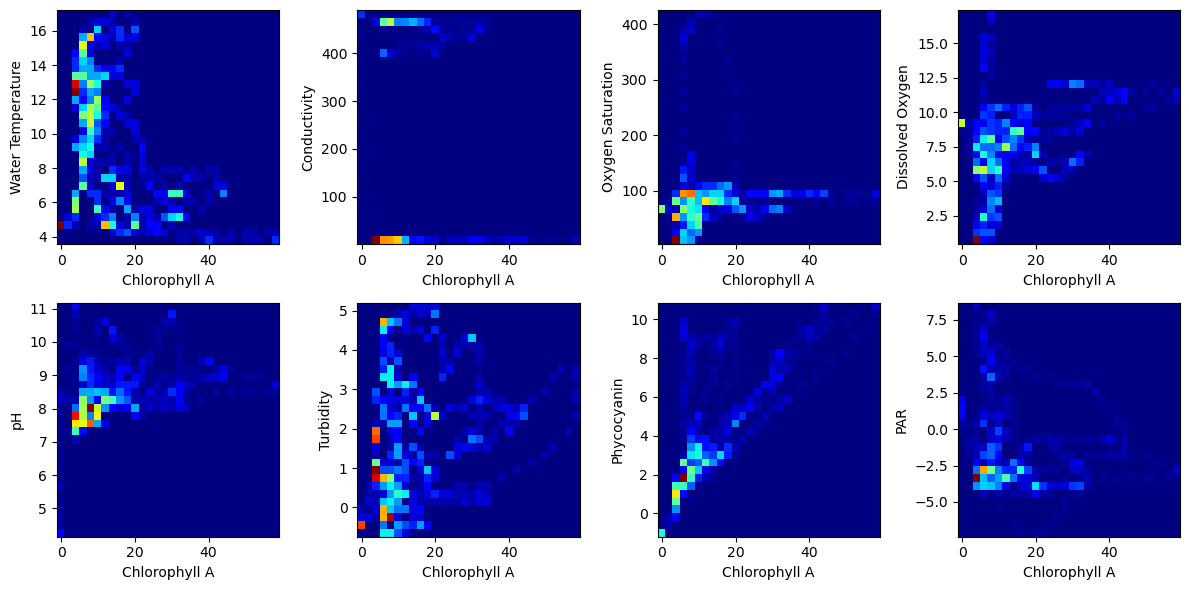

In [80]:
fig, ax, = plt.subplots(ncols=4, nrows=2, figsize=(12,6))
ax[0,0].hist2d(df_g_day_gauss["z6"], df_g_day_gauss["z"], bins=30, cmap="jet")
ax[0,0].set_xlabel("Chlorophyll A")
ax[0,0].set_ylabel("Water Temperature")
ax[0,1].hist2d(df_g_day_gauss["z6"], df_g_day_gauss["z2"], bins=30, cmap="jet")
ax[0,1].set_xlabel("Chlorophyll A")
ax[0,1].set_ylabel("Conductivity")
ax[0,2].hist2d(df_g_day_gauss["z6"], df_g_day_gauss["z3"], bins=30, cmap="jet")
ax[0,2].set_xlabel("Chlorophyll A")
ax[0,2].set_ylabel("Oxygen Saturation")
ax[0,3].hist2d(df_g_day_gauss["z6"], df_g_day_gauss["z4"], bins=30, cmap="jet")
ax[0,3].set_xlabel("Chlorophyll A")
ax[0,3].set_ylabel("Dissolved Oxygen")
ax[1,0].hist2d(df_g_day_gauss["z6"], df_g_day_gauss["z5"], bins=30, cmap="jet")
ax[1,0].set_xlabel("Chlorophyll A")
ax[1,0].set_ylabel("pH")
ax[1,1].hist2d(df_g_day_gauss["z6"], df_g_day_gauss["z7"], bins=30, cmap="jet")
ax[1,1].set_xlabel("Chlorophyll A")
ax[1,1].set_ylabel("Turbidity")
ax[1,2].hist2d(df_g_day_gauss["z6"], df_g_day_gauss["z8"], bins=30, cmap="jet")
ax[1,2].set_xlabel("Chlorophyll A")
ax[1,2].set_ylabel("Phycocyanin")
ax[1,3].hist2d(df_g_day_gauss["z6"], df_g_day_gauss["z9"], bins=30, cmap="jet")
ax[1,3].set_xlabel("Chlorophyll A")
ax[1,3].set_ylabel("PAR")
fig.tight_layout()
fig.show()

/tmp/ipykernel_1074/497669262.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


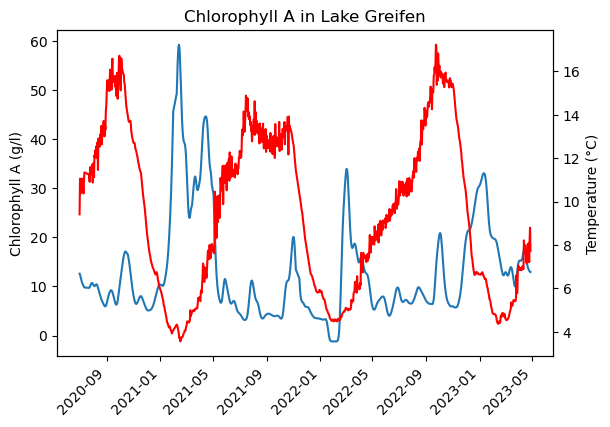

In [81]:
fig, ax = plt.subplots()
ax.plot(df_g_day_gauss["day"], df_g_day_gauss["z6"], label="Chlorophyll A")
ax.set_ylabel("Chlorophyll A (g/l)")
# x label date in 45° angle
fig.autofmt_xdate(rotation=45)
ax.set_title("Chlorophyll A in Lake Greifen")
# twin axis
twin1 = ax.twinx()
twin1.plot(df_g_day_gauss["day"], df_g_day_gauss["z"], label="temperature", color="red")
twin1.set_ylabel("Temperature (°C)")
fig.show()

In [82]:
#fourier spectrum of chlorophyll A
z6_fft = np.fft.fft(df_g_day_gauss["z6"])
z6_fft = np.fft.fftshift(z6_fft)
z6_fft = np.abs(z6_fft)
z6_fft = z6_fft**2
z6_fft = z6_fft/len(z6_fft)
z6_fft = z6_fft[0:int(len(z6_fft)/2)]
z6_fft = z6_fft*2
z6_fft[0] = z6_fft[0]/2
z6_fft = 10*np.log10(z6_fft)
z6_fft = pd.DataFrame(z6_fft)
z6_fft.columns = ["z6_fft"]
z6_fft["freq"] = np.linspace(0, 1, len(z6_fft))
z6_fft["freq"] = z6_fft["freq"]*365
z6_fft["freq"] = z6_fft["freq"]-365/2
z6_fft["freq"] = z6_fft["freq"].apply(lambda x: x if x>0 else x+365)
z6_fft["freq"] = z6_fft["freq"].apply(lambda x: x if x<365 else x-365)
z6_fft.sort_values(by="freq", inplace=True)
z6_fft.reset_index(inplace=True, drop=True)

/tmp/ipykernel_1074/1051159919.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


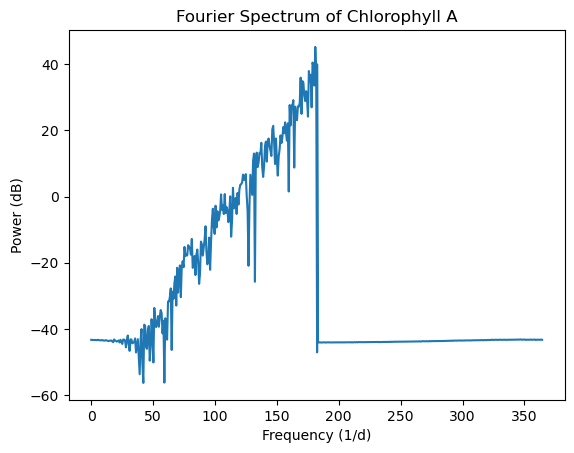

In [83]:
fig, ax = plt.subplots()
ax.plot(z6_fft["freq"], z6_fft["z6_fft"])
ax.set_xlabel("Frequency (1/d)")
ax.set_ylabel("Power (dB)")
ax.set_title("Fourier Spectrum of Chlorophyll A")
fig.show()

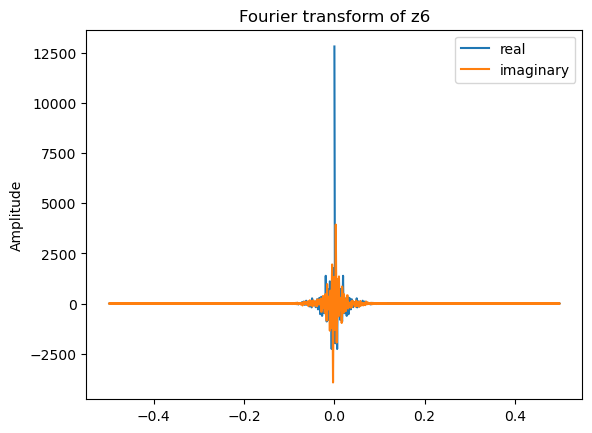

In [85]:
# fourier transform of z6
z6_fft = np.fft.fft(df_g_day_gauss['z6'].values)
z6_fft_freq = np.fft.fftfreq(len(z6_fft), d=1)
plt.plot(z6_fft_freq, z6_fft.real, z6_fft_freq, z6_fft.imag)
plt.title("Fourier transform of z6")
plt.ylabel("Amplitude")
plt.legend(["real","imaginary"])
plt.show()

# Regression analysis of the data lakes

In [86]:
z6data = df_g_day_gauss['z6'].values

In [87]:
train_z6 = z6data[:600]
n_steps = 6
X_train, Y_train = [], []
for i in range(n_steps, len(train_z6)-6):
    X_train.append(train_z6[i-n_steps:i])
    Y_train.append(train_z6[i+6])

test_z6 = z6data[600:]
X_test, Y_test = [], []
for i in range(n_steps, len(test_z6)-6):
    X_test.append(test_z6[i-n_steps:i])
    Y_test.append(test_z6[i+6])

In [88]:
ardRegression = ARDRegression()
bayRegression = BayesianRidge()
ardRegression.fit(X_train, Y_train)
bayRegression.fit(X_train, Y_train)
prediction_ardRegression = ardRegression.predict(X_train)
prediction_bayRegression = bayRegression.predict(X_train)

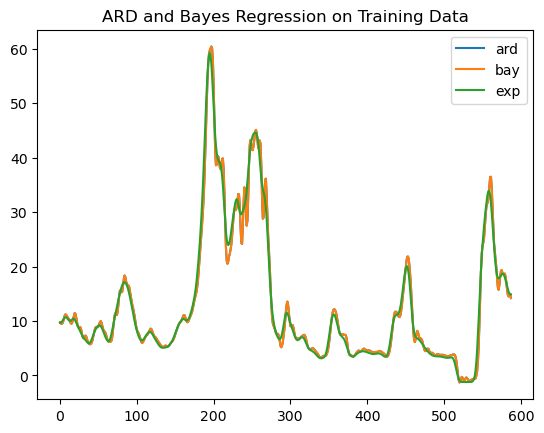

In [89]:
plt.plot(prediction_ardRegression,label="ard")
plt.plot(prediction_bayRegression,label="bay")
plt.plot(np.array(Y_train).tolist(),label='exp')
#plt.plot([0 for i in range(7)]+[y for y in np.array(Y_train).tolist()],label='7 day pre')
plt.legend()
plt.title("ARD and Bayes Regression on Training Data")
plt.show()

In [90]:
predictions_test_ard = ardRegression.predict(X_test)
predictions_test_bay = bayRegression.predict(X_test)

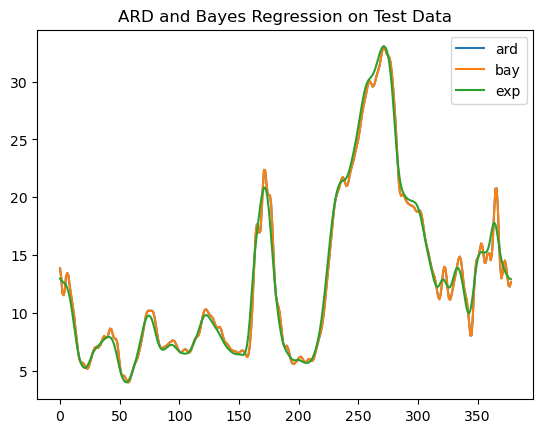

In [91]:
plt.plot(predictions_test_ard,label="ard")
plt.plot(predictions_test_bay,label="bay")
plt.plot(np.array(Y_test).tolist(),label='exp')
#plt.plot([0 for i in range(7)]+[y for y in np.array(Y_test).tolist()],label='7 day pre')
plt.legend()
plt.title("ARD and Bayes Regression on Test Data")
plt.show()

In [92]:
# Calculate RMSE
rmse_ard = np.sqrt(mean_squared_error(Y_test, predictions_test_ard))
rmse_bay = np.sqrt(mean_squared_error(Y_test, predictions_test_bay))
print(f"RMSE ard: {rmse_ard:.4f}, RMSE bay: {rmse_bay:.4f}")

RMSE ard: 0.7814, RMSE bay: 0.7814


## Use pH (z5), Oxigen (z3)and temperature (z)

In [93]:
z6data = gaussian_filter1d(df_g_day['z6'].values,4)
z5data = gaussian_filter1d(df_g_day['z5'].values,4)
z3data = gaussian_filter1d(df_g_day['z3'].values,4)
z_data = gaussian_filter1d(df_g_day['z'].values,4)

In [94]:
X_train, Y_train = [], []
X_test, Y_test = [], []
n_steps = 6
split = 600
for i in range(n_steps, split-6):
    X_train.append([z6data[i-n_steps:i],z5data[i-n_steps:i],z3data[i-n_steps:i], z_data[i-n_steps:i]])
    Y_train.append(z6data[i+6])
for i in range(split, len(z6data)-6):
    X_test.append([z6data[i-n_steps:i],z5data[i-n_steps:i],z3data[i-n_steps:i], z_data[i-n_steps:i]])
    Y_test.append(z6data[i+6])

In [95]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [96]:
# flatten last two dimensions
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

Text(0.5, 1.0, 'Train')

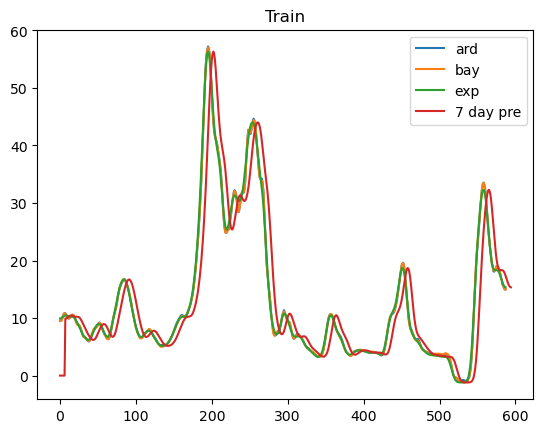

In [97]:
ardRegression = ARDRegression()
bayRegression = BayesianRidge()
ardRegression.fit(X_train, Y_train)
bayRegression.fit(X_train, Y_train)
prediction_ardRegression = ardRegression.predict(X_train)
prediction_bayRegression = bayRegression.predict(X_train)

plt.plot(prediction_ardRegression,label="ard")
plt.plot(prediction_bayRegression,label="bay")
plt.plot(np.array(Y_train).tolist(),label='exp')
plt.plot([0 for i in range(7)]+[y for y in np.array(Y_train).tolist()],label='7 day pre')
plt.legend()
plt.title('Train')

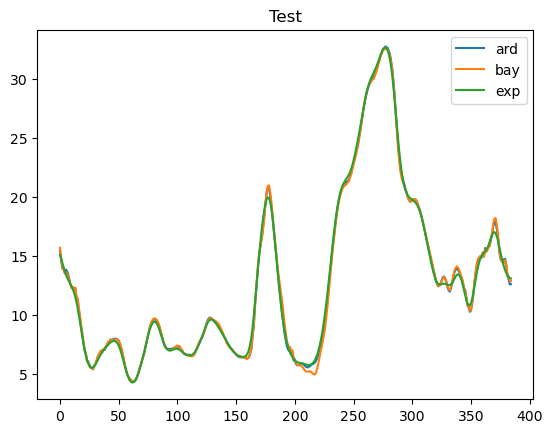

In [98]:
predictions_test_ard = ardRegression.predict(X_test)
predictions_test_bay = bayRegression.predict(X_test)
fig, ax = plt.subplots()
ax.plot(predictions_test_ard,label="ard")
ax.plot(predictions_test_bay,label="bay")
ax.plot(np.array(Y_test).tolist(),label='exp')
#ax.plot([0 for i in range(7)]+[y for y in np.array(Y_test).tolist()],label='7 day pre')
ax.legend()
plt.title('Test')
plt.show()

In [99]:
# rmse for test
rmse_ard = np.sqrt(mean_squared_error(Y_test, predictions_test_ard))
rmse_bay = np.sqrt(mean_squared_error(Y_test, predictions_test_bay))
print('Test RMSE ard: %.3f' % rmse_ard)
print('Test RMSE bay: %.3f' % rmse_bay)

Test RMSE ard: 0.290
Test RMSE bay: 0.419


In [113]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                        solver='sgd', verbose=0,  random_state=42,tol=1e-10)
mlp.fit(X_train,Y_train)
predictions_test_mlp = mlp.predict(X_test)

In [114]:
print('Test RMSE mlp: %.3f' % np.sqrt(mean_squared_error(Y_test, predictions_test_mlp)))

Test RMSE mlp: 4.366


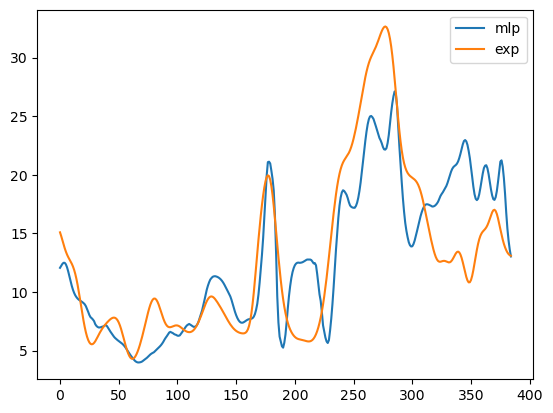

In [115]:
plt.plot(predictions_test_mlp,label="mlp")
plt.plot(np.array(Y_test).tolist(),label='exp')
plt.legend()